# Census Income Project

<strong>Problem Statement:</strong>


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
categorical_columns=[x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [203]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

# Data Description
- Age : Its the age of the person
- Workclass : It decribes if the person is working in Private organisation,Public sector or self employed.
- Fnlwgt : This is final weight which is the number of people the census believes.
- Education : It describes how much educated the person is.
- Education : It is same as Education and describes how educated the person is.
- Marital Status : It describes the marital status of the person.
- Occupation : It is the role which the employee is performing in the organisation.
- Relationship : In laymen ter, Relationship is nothing but how a person is related to another person.
- Race : It is nothing but the origin of the person.
- Sex : It is the gender of the person
- Captial_gain :Capital gain is the profit one earns on the sale of an asset like stocks, bonds or real estate
- Captial_loss :Capital loss is the loss one earns on the sale of an asset like stocks, bonds or real estate
- Hours_per_week : It describes how many hours a person works in a week.
- Native_country : It is the origin of the person, In laymen term, the country the person belongs to
- Income : It describes how much a person earns and it is the label category of our problem

In [10]:
#set(df['Workclass'])
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Without pay and Never worked can be combined into one unique values as they resemble same thing. Also,We see Workclass <strong>?</strong>, its nothing but Nan value, we need to deal with this too and find out which other columns have such values, so let's find that first

In [11]:
# Find for '?' in DataFrame
round((df.isin([' ?']).sum()/df.shape[0])*100, 2).astype(str)+'%'

Age                0.0%
Workclass         5.64%
Fnlwgt             0.0%
Education          0.0%
Education_num      0.0%
Marital_status     0.0%
Occupation        5.66%
Relationship       0.0%
Race               0.0%
Sex                0.0%
Capital_gain       0.0%
Capital_loss       0.0%
Hours_per_week     0.0%
Native_country    1.79%
Income             0.0%
dtype: object

So, there are three columns which has <strong>?</strong> values. lets replace them with NaN

In [12]:
df = df.replace(' ?', np.nan)

In [13]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

We have three columns where we have Nan values.

In [14]:
naN_columns=['Workclass','Occupation','Native_country']

In [15]:
for i in naN_columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [16]:
round((df.isnull().sum()/df.shape[0])*100, 2).astype(str)+'%'

Age               0.0%
Workclass         0.0%
Fnlwgt            0.0%
Education         0.0%
Education_num     0.0%
Marital_status    0.0%
Occupation        0.0%
Relationship      0.0%
Race              0.0%
Sex               0.0%
Capital_gain      0.0%
Capital_loss      0.0%
Hours_per_week    0.0%
Native_country    0.0%
Income            0.0%
dtype: object

So we have successfully dealt with all NaN values, now lets proceed further with analysis of each columns

# Check Duplicates

In [17]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
2302,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3916,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4324,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4766,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4939,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5578,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5804,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5841,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
6989,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
7052,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [18]:
duplicate.shape

(24, 15)

In [19]:
df.drop_duplicates(keep=False,inplace=True)

In [20]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


# Data Analysis

<strong>Workclass</strong>

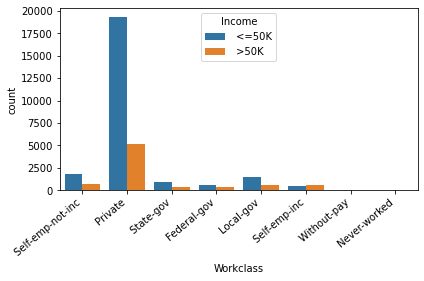

In [21]:
ax = sns.countplot(x="Workclass", data=df,hue='Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

We see that majority of the people earning more than 50K are from the Private Sector followed by Self Employed and lets combine Without-pay and Never-worked into one

In [22]:
df['Workclass'] = df['Workclass'].str.replace('Never-worked', 'Without-pay')

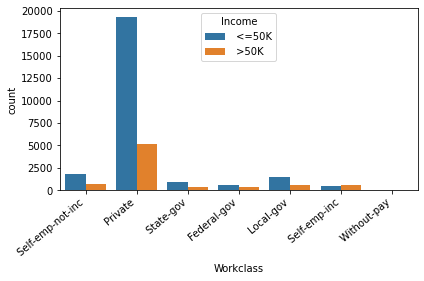

In [23]:
ax = sns.countplot(x="Workclass", data=df,hue='Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Nowe we have successfully replaced Never-worked with Without pay and it makes more sense to our data

# Fnlwgt

In [24]:
df['Fnlwgt'].value_counts()

123011    13
164190    13
203488    13
121124    12
113364    12
          ..
209392     1
218551     1
201204     1
362999     1
145522     1
Name: Fnlwgt, Length: 21637, dtype: int64

The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents

In [25]:
df.groupby('Education').count()[['Income']]

,Income
Education,
10th,933
11th,1175
12th,433
1st-4th,165
5th-6th,331
7th-8th,644
9th,514
Assoc-acdm,1067
Assoc-voc,1382


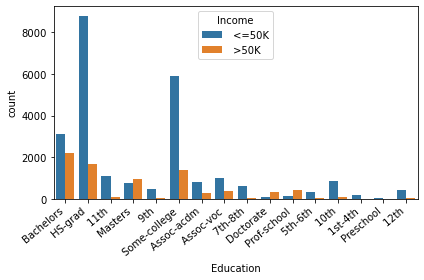

In [26]:
ax = sns.countplot(x="Education", data=df,hue='Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

From the graph, it is clear that bachelors are the one who are earning more than 50K

In [26]:
df['Occupation'].value_counts()

 Prof-specialty       5975
 Craft-repair         4089
 Exec-managerial      4064
 Adm-clerical         3765
 Sales                3650
 Other-service        3287
 Machine-op-inspct    1998
 Transport-moving     1597
 Handlers-cleaners    1368
 Farming-fishing       990
 Tech-support          926
 Protective-serv       649
 Priv-house-serv       146
 Armed-Forces            9
Name: Occupation, dtype: int64

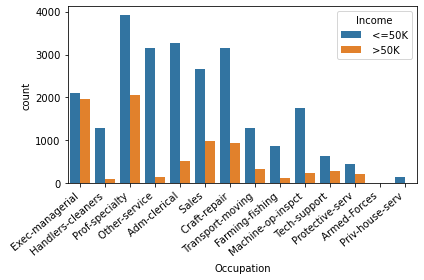

In [27]:
ax = sns.countplot(x="Occupation", data=df,hue='Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

From the occupation, it is clear that more Prof-Specialist and Executive managers earn more than 50K

# Education_num

In [28]:
df.groupby('Education_num').count()[['Income']]

,Income
Education_num,
1,49
2,165
3,331
4,644
5,514
6,933
7,1175
8,433
9,10487


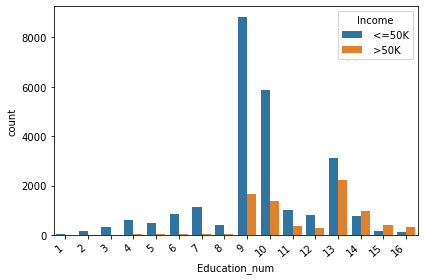

In [29]:
ax = sns.countplot(x="Education_num", data=df,hue='Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Education and Education_num are two columns with same data and different names. So lets drop Education now and proceed with further analysis 

In [30]:
df.drop(['Education'], axis = 1, inplace = True)

In [31]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

We dont see Education column here, it has been dropped successfully

# Marital Status

In [32]:
df.groupby('Marital_status').count()[['Income']]

,Income
Marital_status,
Divorced,4439
Married-AF-spouse,23
Married-civ-spouse,14964
Married-spouse-absent,418
Never-married,10651
Separated,1025
Widowed,993


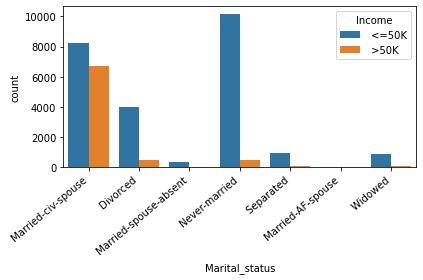

In [33]:
ax = sns.countplot(x="Marital_status", data=df,hue='Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

We see that married people have higher income as compared to others

# Relationship

In [34]:
df.groupby('Relationship').count()[['Income']]

,Income
Relationship,
Husband,13181
Not-in-family,8279
Other-relative,981
Own-child,5060
Unmarried,3444
Wife,1568


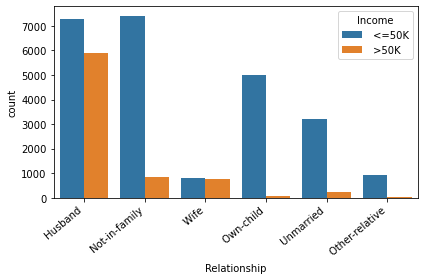

In [35]:
ax = sns.countplot(x="Relationship", data=df,hue='Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

We notice that Husband in the family have a higher salary as compared to other relationship in the family

In [36]:
df.groupby('Race').count()[['Income']]

,Income
Race,
Amer-Indian-Eskimo,311
Asian-Pac-Islander,1037
Black,3120
Other,271
White,27774


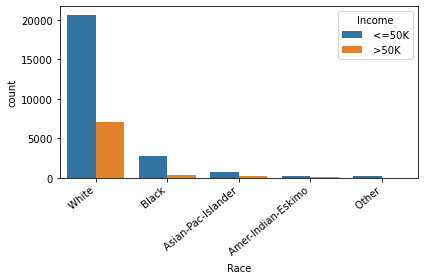

In [37]:
ax = sns.countplot(x="Race", data=df,hue='Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

People with White Race earn more than all other races

In [38]:
df.groupby('Sex').count()[['Income']]

,Income
Sex,
Female,10754
Male,21759


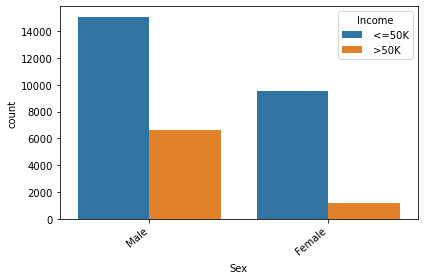

In [39]:
ax = sns.countplot(x="Sex", data=df,hue='Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

We notice that male have more salary than female. Also we see that, the number of men are more than women in our total data

In [40]:
df.groupby('Capital_gain').count()[['Income']]

,Income
Capital_gain,
0,29802
114,6
401,2
594,34
914,8
...,...
25236,11
27828,34
34095,5


<AxesSubplot:xlabel='Capital_gain', ylabel='Count'>

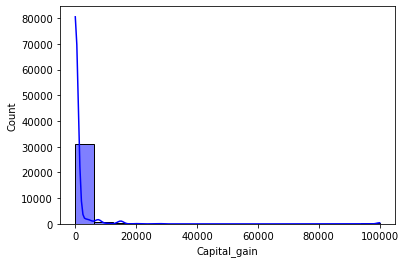

In [41]:
sns.histplot(df.Capital_gain,color="blue",kde=True,stat="count")

Capital_gain with value as 0 have most of the data and we see that it is a bit right skewed

In [42]:
df.groupby('Capital_loss').count()[['Income']]

,Income
Capital_loss,
0,30994
155,1
213,4
323,3
419,3
...,...
3004,2
3683,2
3770,2


<AxesSubplot:xlabel='Capital_loss', ylabel='Count'>

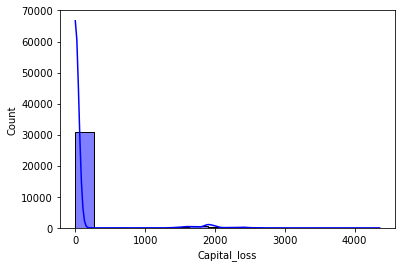

In [43]:
sns.histplot(df.Capital_loss,color="blue",kde=True,stat="count")

Capital_loss with value as 0 have most of the data and we see that it is a bit right skewed

In [44]:
df.groupby('Hours_per_week').count()[['Income']]

,Income
Hours_per_week,
1,20
2,32
3,39
4,54
5,60
...,...
95,2
96,5
97,2


<AxesSubplot:xlabel='Hours_per_week', ylabel='Count'>

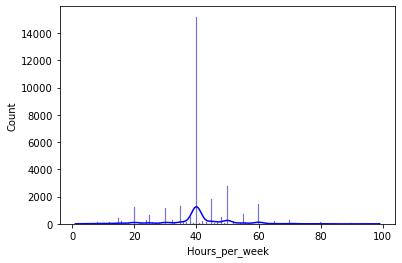

In [45]:
sns.histplot(df.Hours_per_week,color="blue",kde=True,stat="count")

The graph is not skewed and looks like it is normally distributed

In [46]:
df.groupby('Native_country').count()[['Income']]

,Income
Native_country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


We see that United States have maximum count and all other country are non-US country.

In [47]:
df['Native_country'].loc[df['Native_country'] ==' United-States'] = 'USA'
df['Native_country'].loc[df['Native_country'] != 'USA'] = 'Non-USA'
df['Native_country'].value_counts()

USA        29716
Non-USA     2797
Name: Native_country, dtype: int64

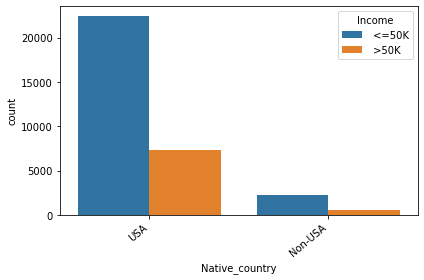

In [48]:
ax = sns.countplot(x="Native_country", data=df,hue='Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

People in USA earn more than people in all other countries apart from USA

In [49]:
# Checking the counts of Income(Label category)
income = df['Income'].value_counts(normalize=True)
round(income * 100, 2).astype('str')+'%'

 <=50K    75.9%
 >50K     24.1%
Name: Income, dtype: object

75.9% of the people are those who earn less than 50K and 24.1% earn more than 50K

<AxesSubplot:xlabel='Income', ylabel='count'>

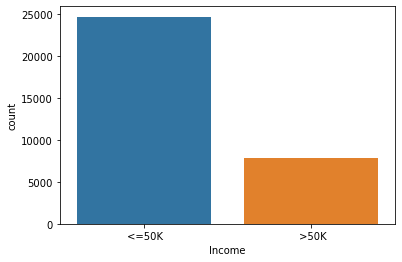

In [51]:
sns.countplot(df['Income'])

The data is a bit imbalanced and we will use SMOTE to deal with it further

# Deal with Object DataTypes

In [52]:
categorical_columns=[x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns

['Workclass',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [53]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])

In [54]:
df.tail()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,2,257302,12,2,12,5,4,0,0,0,38,1,0
32556,40,2,154374,9,2,6,0,4,1,0,0,40,1,1
32557,58,2,151910,9,6,0,4,4,0,0,0,40,1,0
32558,22,2,201490,9,4,0,3,4,1,0,0,20,1,0
32559,52,3,287927,9,2,3,5,4,0,15024,0,40,1,1


In [55]:
df.shape

(32513, 14)

# Heatmap

<AxesSubplot:>

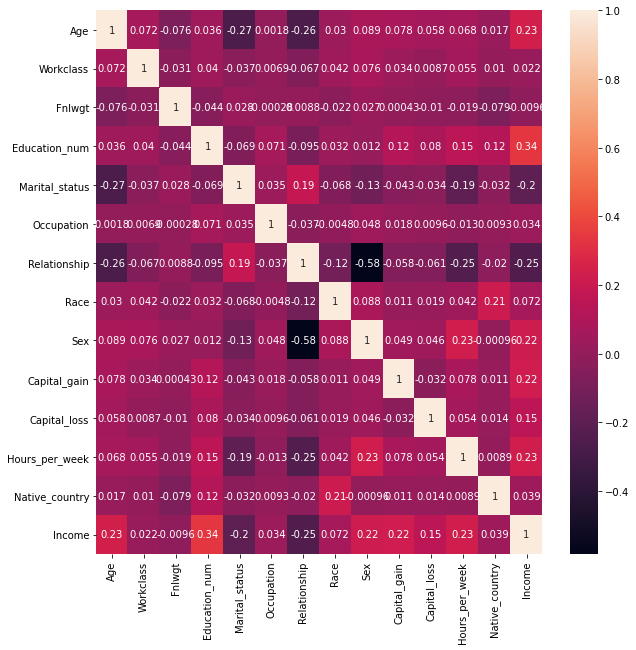

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

No two columns are highly correlated with each other. 

# Outlier Checking

In [56]:
dataToPlot=df.drop(columns= ['Income','Hours_per_week','Fnlwgt'])
dataToPlot.head(2)

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Native_country
0,50,4,13,2,3,0,4,1,0,0,1
1,38,2,9,0,5,1,4,1,0,0,1


In [57]:
targetToPlot=df.loc[:, df.columns == 'Income']
targetToPlot.head(2)

,Income
0,0
1,0


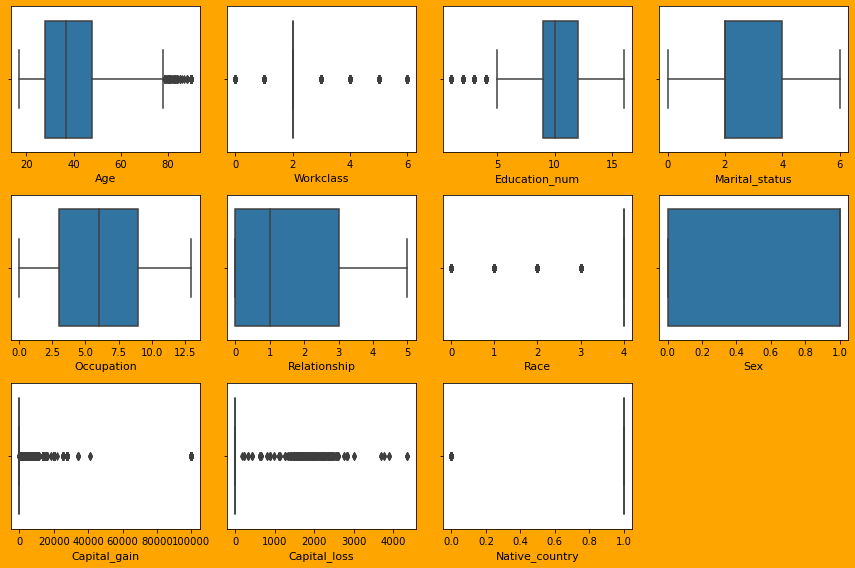

In [58]:
#Lets see data distribution now using Boxplot
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=12:
        ax=plt.subplot(3,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

Capital_gain and Capital_loss have maximum outliers, so lets deal with it now

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df.loc[:,'Fnlwgt':'Hours_per_week']))
z.shape

(32513, 10)

In [60]:
threshold=3
print(np.where(z>3))

(array([    9,    10,    13, ..., 32485, 32503, 32505], dtype=int64), array([9, 5, 5, ..., 5, 5, 5], dtype=int64))


In [61]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(32513, 14)
(28647, 14)


In [62]:
((32513-29802)/32513)*100

8.338203180266355

Our deletion range should not be more than 5%, and it is more than 8.3%, so we are not deleting any data.

# Skewness

In [63]:
df_features=df.drop(columns=['Income'])

In [64]:
#Check Data Skewness
skew_df=pd.DataFrame({'Skewness':df_features.skew()}) 
skew_df

,Skewness
Age,0.556620
Workclass,1.223217
Fnlwgt,1.448435
Education_num,-0.307798
Marital_status,-0.011997
Occupation,0.000239
Relationship,0.786279
Race,-2.435289
Sex,-0.719458
Capital_gain,11.944984


In [65]:
print("Out of",len(df_features.skew()),"features",len(df_features.skew().loc[abs(df_features.skew())>0.5]) ,"are skewed")

Out of 13 features 9 are skewed


# Log1P Transformation

In [66]:
for index in df_features.skew().index:
    if df_features.skew().loc[index]>0.5:
        df_features[index]=np.log1p(df_features[index])
    if df_features.skew().loc[index]<-0.5:
        df_features[index]=np.square(df_features[index])
print(df_features.skew())
print("Out of",len(df_features.skew()),"features",len(df_features.skew().loc[abs(df_features.skew())>0.5]) 
      ,"is skewed and has improved skewness value than previous skewness values")

Age              -0.114332
Workclass         1.299376
Fnlwgt           -0.670704
Education_num    -0.307798
Marital_status   -0.011997
Occupation        0.000239
Relationship      0.284999
Race             -2.120253
Sex              -0.719458
Capital_gain      3.093910
Capital_loss      4.303864
Hours_per_week    0.229877
Native_country   -2.952824
dtype: float64
Out of 13 features 7 is skewed and has improved skewness value than previous skewness values


# Dividing into Features and Target

In [67]:
df_features=df.drop(columns=['Income'])
df_features.shape

(32513, 13)

In [68]:
target=df[["Income"]]
target.shape

(32513, 1)

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

In [70]:
X_vif=df
X_vif.head(1)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,13,2,3,0,4,1,0,0,13,1,0


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,1.192402,Age
1,1.015729,Workclass
2,1.015717,Fnlwgt
3,1.176061,Education_num
4,1.136309,Marital_status
5,1.010776,Occupation
6,1.686789,Relationship
7,1.066082,Race
8,1.579781,Sex
9,1.063334,Capital_gain


We dont see any multicollinearity problem here, Hence we are good to go

In [72]:
features=df.drop(columns=['Income'])

# Feature Importance

In [73]:
features.shape, target.shape

((32513, 13), (32513, 1))

In [74]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
feature_rf = RandomForestRegressor()
feature_rf.fit(features,target)
print(feature_rf.feature_importances_)

[0.12354906 0.03509735 0.19945723 0.12629113 0.00701974 0.06219235
 0.19818657 0.01369332 0.00367172 0.11327374 0.03686267 0.07305142
 0.0076537 ]


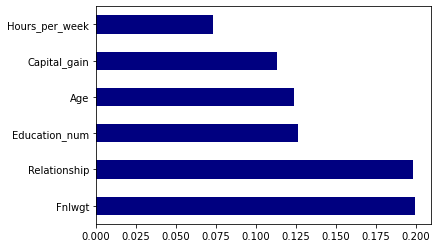

In [75]:
#plot graph of feature importances for better visualization
featureImportance = pd.Series(feature_rf.feature_importances_, index=features.columns)
featureImportance.nlargest(6).plot(kind='barh',color="navy") # Lets plot for 8 features 
plt.show()

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(target)
target=le.transform(target)
target

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Model Building

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix

In [78]:
def get_accuracy_score(model,x,y):
    max_accuracy_score=0
    for i in range(40,100):
        x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=i)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        accuracy=accuracy_score(y_test,pred_test)
        print("At",i," accuracy score is ",accuracy)
        if accuracy>max_accuracy_score:
            max_accuracy_score=accuracy
            final_i=i
    print("At",final_i,"max_accuracy_score is :",max_accuracy_score)
    return final_i

# Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [80]:
get_accuracy_score(lgr,features,target)

At 40  accuracy score is  0.6643087805628172
At 41  accuracy score is  0.6540058434568661
At 42  accuracy score is  0.6443180070736583
At 43  accuracy score is  0.6712286636936798
At 44  accuracy score is  0.6458557588805167
At 45  accuracy score is  0.6581577733353837
At 46  accuracy score is  0.6812240504382593
At 47  accuracy score is  0.6584653236967554
At 48  accuracy score is  0.657850222974012
At 49  accuracy score is  0.67676457019837
At 50  accuracy score is  0.7891742272797171
At 51  accuracy score is  0.6910656620021528
At 52  accuracy score is  0.6935260648931263
At 53  accuracy score is  0.673842841765339
At 54  accuracy score is  0.6533907427341227
At 55  accuracy score is  0.7790250653544518
At 56  accuracy score is  0.6412425034599416
At 57  accuracy score is  0.6498539135783484
At 58  accuracy score is  0.6526218668306936
At 59  accuracy score is  0.6393972012917115
At 60  accuracy score is  0.6687682608027065
At 61  accuracy score is  0.6756881439335691
At 62  accurac

50

In [84]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=50,test_size=0.20)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lgr.fit(x_train,y_train)
pred_train=lgr.predict(x_train)
pred_test=lgr.predict(x_test)
rocauc_scoreLR=roc_auc_score(y_test,pred_test)
accuracy_scoreLR=accuracy_score(y_test,pred_test)
accuracy_scoreLR

0.7891742272797171

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      4975
           1       0.60      0.32      0.42      1528

    accuracy                           0.79      6503
   macro avg       0.71      0.63      0.64      6503
weighted avg       0.77      0.79      0.76      6503

Confusion Matrix
 [[4641  334]
 [1037  491]]


# Cross Validation

In [86]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
#
# Pass instance of pipeline and training and test data set
# cv=5 represents the StratifiedKFold with 5 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=5, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
lgr_cvScore=(np.mean(scores))
lgr_cvScore

Cross Validation accuracy: 0.772 +/- 0.013


0.7720172624902016

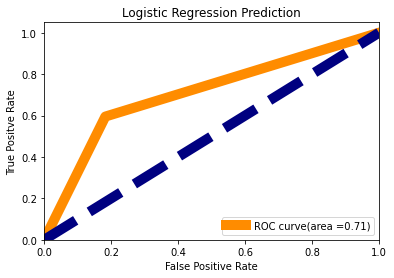

In [87]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Logistic Regression Prediction')
plt.legend(loc="lower right")
plt.show()

In [88]:
score_data = {'Model': ['Logistic Regression'], 
              'Accuracy': accuracy_scoreLR*100,
              'Cross Validation Score':lgr_cvScore*100,
             'Difference(Accuracy-CV)':(accuracy_scoreLR-lgr_cvScore)*100
            }

df_LR = pd.DataFrame(score_data)  
df_LR

,Model,Accuracy,Cross Validation Score,Difference(Accuracy-CV)
0,Logistic Regression,78.917423,77.201726,1.715696


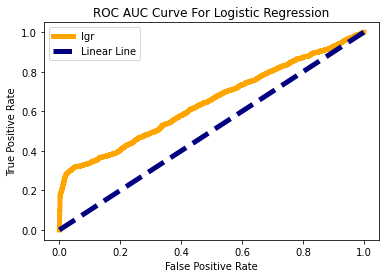

In [89]:
from sklearn.metrics import roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='lgr',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Logistic Regression")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

# Naive Byes

In [183]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [91]:
get_accuracy_score(nb,features,target)

At 40  accuracy score is  0.7893280024604029
At 41  accuracy score is  0.7871751499308012
At 42  accuracy score is  0.7874827002921728
At 43  accuracy score is  0.7905582039058896
At 44  accuracy score is  0.7928648316161772
At 45  accuracy score is  0.7925572812548055
At 46  accuracy score is  0.7937874827002922
At 47  accuracy score is  0.7922497308934338
At 48  accuracy score is  0.7879440258342304
At 49  accuracy score is  0.7920959557127479
At 50  accuracy score is  0.7993233892049824
At 51  accuracy score is  0.8011686913732123
At 52  accuracy score is  0.8027064431800708
At 53  accuracy score is  0.7885591265569737
At 54  accuracy score is  0.7874827002921728
At 55  accuracy score is  0.7904044287252038
At 56  accuracy score is  0.7933261571582346
At 57  accuracy score is  0.799630939566354
At 58  accuracy score is  0.7888666769183453
At 59  accuracy score is  0.7865600492080578
At 60  accuracy score is  0.793941257880978
At 61  accuracy score is  0.7954790096878364
At 62  accur

52

In [92]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=52,test_size=0.20)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
nb.fit(x_train,y_train)
pred_train=nb.predict(x_train)
pred_test=nb.predict(x_test)
rocauc_scoreNB=roc_auc_score(y_test,pred_test)
accuracy_scoreNB=accuracy_score(y_test,pred_test)
accuracy_scoreNB

0.8028602183607566

In [93]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4995
           1       0.65      0.33      0.43      1508

    accuracy                           0.80      6503
   macro avg       0.74      0.64      0.66      6503
weighted avg       0.78      0.80      0.78      6503

Confusion Matrix
 [[4728  267]
 [1015  493]]


In [94]:
cv_nb=cross_val_score(nb,features,target,cv=5)
print('Cross Validation score of Naive Byes model is :',cv_nb.mean())

Cross Validation score of Naive Byes model is : 0.7949743470739412


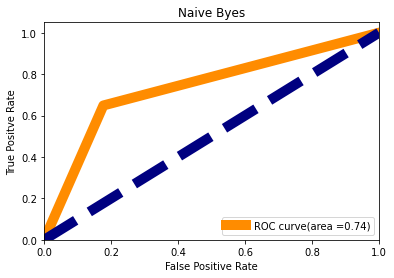

In [99]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Naive Byes')
plt.legend(loc="lower right")
plt.show()

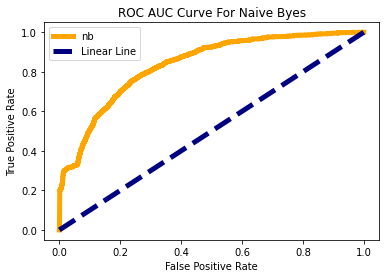

In [100]:
from sklearn.metrics import roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test,nb.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,nb.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='nb',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Naive Byes")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [184]:
score_data = {'Model': ['Naive Byes'], 
              'Accuracy': accuracy_scoreNB*100,
              'Cross Validation Score':cv_nb.mean()*100,
              'Difference(Accuracy-CV)':(accuracy_scoreNB-cv_nb.mean())*100
            }

df_NB = pd.DataFrame(score_data)  
df_NB

,Model,Accuracy,Cross Validation Score,Difference(Accuracy-CV)
0,Naive Byes,80.286022,79.497435,0.788587


# Decision Tree Classifier

In [146]:
from sklearn.tree import DecisionTreeClassifier

# creating model
decTree = DecisionTreeClassifier()
params={'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [147]:
grid_Search=GridSearchCV(estimator=decTree,param_grid=params,cv=5,n_jobs=-1)

grid_Search.fit(x_train,y_train)
print("Best_Params_",grid_Search.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11}


In [148]:
get_accuracy_score(decTree,features,target)

At 40  accuracy score is  0.7933261571582346
At 41  accuracy score is  0.7899431031831462
At 42  accuracy score is  0.7973243118560664
At 43  accuracy score is  0.799630939566354
At 44  accuracy score is  0.795786560049208
At 45  accuracy score is  0.7848685222205136
At 46  accuracy score is  0.8019375672766416
At 47  accuracy score is  0.8042441949869291
At 48  accuracy score is  0.7997847147470398
At 49  accuracy score is  0.7905582039058896
At 50  accuracy score is  0.7904044287252038
At 51  accuracy score is  0.7976318622174381
At 52  accuracy score is  0.7960941104105798
At 53  accuracy score is  0.793018606796863
At 54  accuracy score is  0.7879440258342304
At 55  accuracy score is  0.7916346301706905
At 56  accuracy score is  0.7827156696909119
At 57  accuracy score is  0.796709211133323
At 58  accuracy score is  0.796709211133323
At 59  accuracy score is  0.7897893280024604
At 60  accuracy score is  0.7851760725818853
At 61  accuracy score is  0.7974780870367523
At 62  accuracy

47

In [149]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=47,stratify=target)
decTrees=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,max_depth=15,min_samples_split=11)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
decTrees.fit(x_train,y_train)
pred_train=decTrees.predict(x_train)
pred_test=decTrees.predict(x_test)
rocauc_scoreTree=roc_auc_score(y_test,pred_test)
accuracy_scoreTree=accuracy_score(y_test,pred_test)
accuracy_scoreTree

0.8151622328156236

In [150]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      4936
           1       0.59      0.78      0.67      1567

    accuracy                           0.82      6503
   macro avg       0.75      0.80      0.77      6503
weighted avg       0.84      0.82      0.82      6503

Confusion Matrix
 [[4086  850]
 [ 352 1215]]


In [151]:
# Cross Validation
for j in range(2,10):
    lsScore=cross_val_score(decTrees,features,target,cv=j)
    lsc=lsScore.mean()
    print("At cv",j)
    print("Cross Validation score is :",lsc*100)
    print("accuracy score is : ",accuracy_score(y_test,pred_test)*100)
    print('\n')

At cv 2
Cross Validation score is : 83.88338163324194
accuracy score is :  81.51622328156236


At cv 3
Cross Validation score is : 84.37241043613675
accuracy score is :  81.51622328156236


At cv 4
Cross Validation score is : 84.48005314222047
accuracy score is :  81.51622328156236


At cv 5
Cross Validation score is : 84.49852097224321
accuracy score is :  81.51622328156236


At cv 6
Cross Validation score is : 84.88296593842541
accuracy score is :  81.51622328156236


At cv 7
Cross Validation score is : 84.92912500597683
accuracy score is :  81.51622328156236


At cv 8
Cross Validation score is : 84.91375386194807
accuracy score is :  81.51622328156236


At cv 9
Cross Validation score is : 84.82149178906367
accuracy score is :  81.51622328156236




The cross validation score is slighlty more than accuracy score, so the model is a bit overfit but in case of logistic regression and Naive Byes, it is not the same.

In [152]:
cv_DecTree=cross_val_score(decTrees,features,target,cv=2)
print('Cross Validation score of Naive Byes model is :',cv_DecTree.mean())

Cross Validation score of Naive Byes model is : 0.8390183465487187


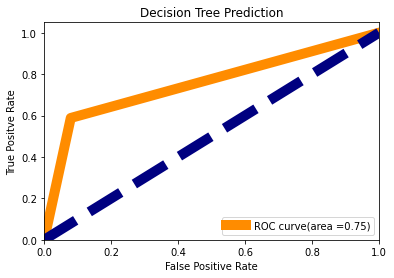

In [153]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Decision Tree Prediction')
plt.legend(loc="lower right")
plt.show()

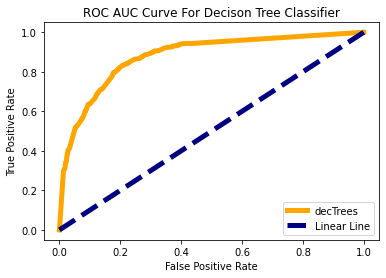

In [154]:
from sklearn.metrics import roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test,decTrees.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,decTrees.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='decTrees',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Decison Tree Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [155]:
score_data = {'Model': ['Decision Tree'], 
              'Accuracy': (accuracy_scoreTree)*100,
              'Cross Validation Score':(cv_DecTree.mean())*100,
              'Difference(Accuracy-CV)':(accuracy_scoreTree-cv_DecTree.mean())*100
             }  

df_dt = pd.DataFrame(score_data)  
df_dt

,Model,Accuracy,Cross Validation Score,Difference(Accuracy-CV)
0,Decision Tree,81.516223,83.901835,-2.385611


# Random Forest Claaifier

In [156]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
clf_rf = RandomForestClassifier()
params={'n_estimators':[100,150],
        'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'n_estimators': [100, 150],
 'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [265]:
grd=GridSearchCV(clf_rf,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params_",grd.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}


In [157]:
get_accuracy_score(clf_rf,features,target)

At 40  accuracy score is  0.832692603413809
At 41  accuracy score is  0.8365369829309549
At 42  accuracy score is  0.8400738120867292
At 43  accuracy score is  0.844071966784561
At 44  accuracy score is  0.8425342149777026
At 45  accuracy score is  0.8359218822082116
At 46  accuracy score is  0.8429955405197601
At 47  accuracy score is  0.8382285099184992
At 48  accuracy score is  0.8377671843764416
At 49  accuracy score is  0.8346916807627249
At 50  accuracy score is  0.8453021682300477
At 51  accuracy score is  0.8373058588343841
At 52  accuracy score is  0.8419191142549592
At 53  accuracy score is  0.8371520836536983
At 54  accuracy score is  0.8323850530524374
At 55  accuracy score is  0.8346916807627249
At 56  accuracy score is  0.8379209595571275
At 57  accuracy score is  0.8380747347378134
At 58  accuracy score is  0.8357681070275258
At 59  accuracy score is  0.8343841304013532
At 60  accuracy score is  0.8436106412425035
At 61  accuracy score is  0.8456097185914193
At 62  accur

64

In [174]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=64)
clf_rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=5,max_depth=15,min_samples_split=10,n_estimators=150)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
clf_rfc.fit(x_train,y_train)
pred_train=clf_rfc.predict(x_train)
pred_test=clf_rfc.predict(x_test)
rocauc_scoreRF=roc_auc_score(y_test,pred_test)
accuracy_scoreRF=accuracy_score(y_test,pred_test)
accuracy_scoreRF

0.841304013532216

In [175]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.87      0.89      4983
           1       0.63      0.76      0.69      1520

    accuracy                           0.84      6503
   macro avg       0.78      0.81      0.79      6503
weighted avg       0.86      0.84      0.85      6503

Confusion Matrix
 [[4312  671]
 [ 361 1159]]


In [176]:
#So with above data,lets select CV as 4, as most of them as same CV
lsScore_selected=cross_val_score(clf_rfc,features,target,cv=4).mean()
print("The CV score is :",lsScore_selected,"\n The accuracy score is: ",accuracy_scoreRF)

The CV score is : 0.8628856959456908 
 The accuracy score is:  0.841304013532216


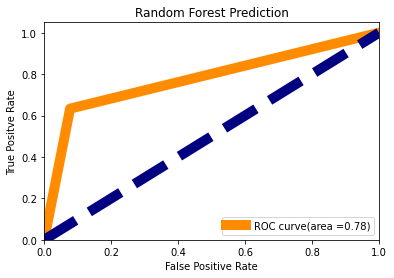

In [179]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Random Forest Prediction')
plt.legend(loc="lower right")
plt.show()

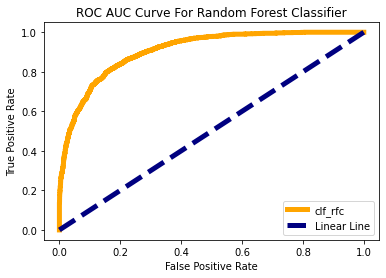

In [180]:
from sklearn.metrics import roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test,clf_rfc.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,clf_rfc.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='clf_rfc',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Random Forest Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [181]:
score_data = {'Model': ['Random Forest'], 
              'Accuracy': accuracy_scoreRF*100,
              'Cross Validation Score':lsScore_selected*100,
              'Difference(Accuracy-CV)':(accuracy_scoreRF-lsScore_selected.mean())*100             
             }  

df_RF = pd.DataFrame(score_data)  
df_RF

,Model,Accuracy,Cross Validation Score,Difference(Accuracy-CV)
0,Random Forest,84.130401,86.28857,-2.158168


In [185]:
modelDF=pd.concat([df_LR,df_dt,df_RF,df_NB]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,Accuracy,Cross Validation Score,Difference(Accuracy-CV)
0,Logistic Regression,78.917423,77.201726,1.715696
1,Decision Tree,81.516223,83.901835,-2.385611
2,Random Forest,84.130401,86.288570,-2.158168
3,Naive Byes,80.286022,79.497435,0.788587


In [186]:
roc_auc_dict = {} #ROC AUC dict for TPR and FPR values
precision_recall_dict = {} #precision recall dictionary

def modify_roc_auc_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for ROC AUC metrics
    fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    clf_roc_auc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    modify_dictionary[name] = clf_roc_auc_dict
    
def modify_precision_recall_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for precision recall metrics
    precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    precision_recall_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    modify_dictionary[name] = precision_recall_dict

In [187]:
def fit_clf(clf, x_train, y_train, x_test, y_test, name='clf'): 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test)
    class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    class_report['clf'] = name 
    return class_report

In [188]:
lgr_report = fit_clf(lgr, x_train, y_train, x_test, y_test, name='Logistic Regression')
lgr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.815189,0.557377,0.781332,0.686283,0.754928,Logistic Regression
recall,0.924142,0.313158,0.781332,0.618650,0.781332,Logistic Regression
f1-score,0.866253,0.401011,0.781332,0.633632,0.757508,Logistic Regression
support,4983.000000,1520.000000,0.781332,6503.000000,6503.000000,Logistic Regression


In [189]:
naiveByes_report = fit_clf(nb, x_train, y_train, x_test, y_test, name='NaiveByesClassifier')
naiveByes_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.817516,0.614786,0.79348,0.716151,0.770130,NaiveByesClassifier
recall,0.940397,0.311842,0.79348,0.626120,0.793480,NaiveByesClassifier
f1-score,0.874662,0.413793,0.79348,0.644227,0.766939,NaiveByesClassifier
support,4983.000000,1520.000000,0.79348,6503.000000,6503.000000,NaiveByesClassifier


In [190]:
tree_report = fit_clf(decTrees, x_train, y_train, x_test, y_test, name='DecisionTreeClassifier')
tree_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.926736,0.578133,0.815931,0.752434,0.845254,DecisionTreeClassifier
recall,0.825005,0.786184,0.815931,0.805595,0.815931,DecisionTreeClassifier
f1-score,0.872916,0.666295,0.815931,0.769606,0.824621,DecisionTreeClassifier
support,4983.000000,1520.000000,0.815931,6503.000000,6503.000000,DecisionTreeClassifier


In [191]:
forest_report = fit_clf(clf_rfc, x_train, y_train, x_test, y_test, name='RandomForestClassifier')
forest_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.925151,0.628281,0.83992,0.776716,0.855761,RandomForestClassifier
recall,0.860726,0.771711,0.83992,0.816218,0.839920,RandomForestClassifier
f1-score,0.891777,0.692648,0.83992,0.792213,0.845233,RandomForestClassifier
support,4983.000000,1520.000000,0.83992,6503.000000,6503.000000,RandomForestClassifier


In [192]:
#Lets Check the Keys which we have
roc_auc_dict.keys()

dict_keys([])

In [193]:
modify_roc_auc_dict(clf=lgr,y_test=y_test,x_test=x_test,name='LogisticRegresssion',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=nb,y_test=y_test,x_test=x_test,name='NaiveByesClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=decTrees,y_test=y_test,x_test=x_test,name='DecisionTreeClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=clf_rfc,y_test=y_test,x_test=x_test,name='RandomForestClassifier',modify_dictionary=roc_auc_dict)

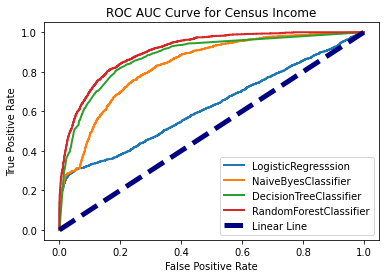

In [194]:
for key in roc_auc_dict:
    clf = roc_auc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key,lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve for Census Income")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()
plt.show()

We see that Naive Byes Classifier has the least difference between the Accuracy score and the Cross Validation Score and Decision Treee and Random Forest Classifier is slightly overfit. Hence we will select Naive Byes Classifier for our problem.

In [195]:
#Predicting the test cases
predict_Income = pd.DataFrame({ 'actual':  y_test,
                                'predicted': nb.predict(x_test),
                                'Correctly_Predicted':(y_test)-(nb.predict(x_test))
                            })
predict_Income

,actual,predicted,Correctly_Predicted
0,1,1,0
1,1,0,1
2,1,0,1
3,0,0,0
4,1,0,1
...,...,...,...
6498,0,0,0
6499,0,0,0
6500,0,1,-1
6501,1,1,0


In [196]:
predict_Income = predict_Income.reset_index()
predict_Income['Correctly_Predicted'].value_counts()


 0    5160
 1    1046
-1     297
Name: Correctly_Predicted, dtype: int64

<AxesSubplot:xlabel='Correctly_Predicted', ylabel='count'>

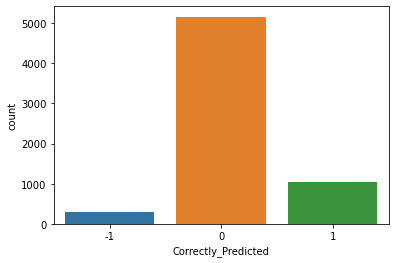

In [198]:
sns.countplot(predict_Income.Correctly_Predicted)

Out of 6503,6206 records were predicted well with our model, Hence the Naive Byes Classification model is performing well.

# Saving the Model

In [199]:
from joblib import dump , load
dump(nb,'Census.joblib')
naiveByes_load=load('Census.joblib')

In [200]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'Census.joblib')

In [201]:
import joblib
joblib.dump(nb, filename) 
#['...Census.joblib']

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmpp7rpeiwm\\Census.joblib']

In [202]:
joblib.load(filename)

GaussianNB()